In [1]:
#Importing all necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras  
from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
# reading training and testing data from github link of csv file
bank_note_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/testing_set_label.csv")

In [3]:
#Shhowing first five rows from this bank_note_data 
bank_note_data.head()

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


In [4]:
# Check for null and other information
bank_note_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWTI    1096 non-null   float64
 1   SWTI    1096 non-null   float64
 2   CWTI    1096 non-null   float64
 3   EI      1096 non-null   float64
 4   Class   1096 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 42.9 KB


In [5]:
#creating X by droping target column
X = bank_note_data.drop("Class", axis=1)
#creating y using target column
y = bank_note_data.Class

In [6]:
#Standardizing all the numerical column values in both training and testing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
test_data = pd.DataFrame(scaler.fit_transform(test_data), columns = test_data.columns)

In [7]:
#Splitting data into training and testing set, testing = 0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [8]:
#Building the Sequential layer with one input, ine hidden and one output layer
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
#compile model with binary_cross_entropy loss and adam optimizer
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy', optimizer= 'adam' , metrics=['accuracy'])

In [10]:
#Fitting the model with the validation data of 20% for 200 epocs and batch size of 10
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=10, verbose=1)

Epoch 1/50
70/70 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.5557 - val_loss: 0.6550 - val_accuracy: 0.7159
Epoch 2/50
70/70 [==============================] - 0s 1ms/step - loss: 0.6314 - accuracy: 0.7657 - val_loss: 0.5866 - val_accuracy: 0.8409
Epoch 3/50
70/70 [==============================] - 0s 1ms/step - loss: 0.5519 - accuracy: 0.8814 - val_loss: 0.4988 - val_accuracy: 0.9375
Epoch 4/50
70/70 [==============================] - 0s 1ms/step - loss: 0.4538 - accuracy: 0.9371 - val_loss: 0.3869 - val_accuracy: 0.9773
Epoch 5/50
70/70 [==============================] - 0s 1ms/step - loss: 0.3400 - accuracy: 0.9571 - val_loss: 0.2679 - val_accuracy: 0.9830
Epoch 6/50
70/70 [==============================] - 0s 1ms/step - loss: 0.2336 - accuracy: 0.9686 - val_loss: 0.1714 - val_accuracy: 0.9830
Epoch 7/50
70/70 [==============================] - 0s 1ms/step - loss: 0.1592 - accuracy: 0.9771 - val_loss: 0.1139 - val_accuracy: 0.9943
Epoch 8/50
70/70 [==

In [11]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0091 - accuracy: 0.9955


[0.009096630848944187, 0.9954545497894287]

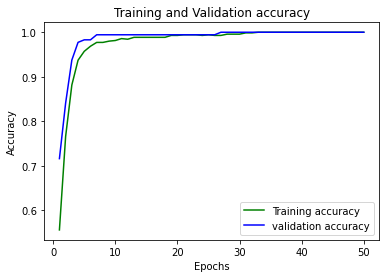

In [12]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

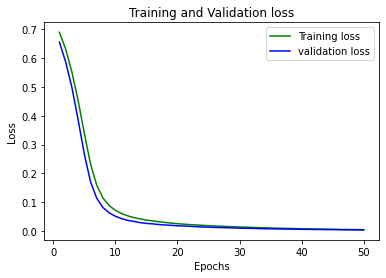

In [13]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()